# CPS305 Fall 2019
## Lab 06 Report
## Sameer Naumani, Std ID 500703778

10/27/2019

# Introduction and Overall Comments

The goal of this lab is to explore the quickSort Algorithm. In the excercise we utilize the pre-defined quickSort algorithm and Re-implement the median-of-three method (see Section 5.12 of the textbook) for selecting a pivot value as amodification to quickSort. After which testing was done on the new implementation in the test.py file. Additionally an experiment was devised to check the run time of both functioins

Overall, the lab gave a better understanding of the quickSort algorithm and how to best decide a pivot value.

## Solution for exercise 1

In [60]:
#Implement the median-of-three method (see Section 5.12 of the textbook) 
# for selecting a pivot value as amodification to quickSort (ame this function mo3_quickSort). 
# Prepare test cases for your mo3_quickSort

def mo3_quickSort(alist):
    quickSortHelper(alist,0,len(alist)-1)

def quickSortHelper(alist,first,last):
    if first<last:
        splitpoint = partition(alist,first,last)
        quickSortHelper(alist,first,splitpoint-1)
        quickSortHelper(alist,splitpoint+1,last)


def partition(alist,first,last):
    #find middle index
    middleindex = median(alist,first,last,(first+last)//2)
    #print(middleindex)
    #swap first element with the pivot value chosen
    alist[first],alist[middleindex] = alist[middleindex],alist[first]
    
    pivotvalue = alist[first]

    leftmark = first+1
    rightmark = last

    done = False
    while not done:
        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp

    return rightmark

# Implement median
def median(alist, first, last, middle):
    if alist[first] < alist[last]:
        return last if alist[last] < alist[middle] else int(middle)
    else:
        return first if alist[first] < alist[middle] else int(middle)


alist = [54,26,93,17,77,31,44,55,20]
mo3_quickSort(alist)
print(alist)


[17, 20, 26, 31, 44, 54, 55, 77, 93]


In [41]:
    
#Original Quick Sort
def quickSort(alist):
    quickSortHelper2(alist,0,len(alist)-1)

def quickSortHelper2(alist,first,last):
    if first<last:
        splitpoint = partition2(alist,first,last)
        quickSortHelper2(alist,first,splitpoint-1)
        quickSortHelper2(alist,splitpoint+1,last)


def partition2(alist,first,last):
    pivotvalue = alist[first]

    leftmark = first+1
    rightmark = last

    done = False
    while not done:

        while leftmark <= rightmark and alist[leftmark] <= pivotvalue:
            leftmark = leftmark + 1

        while alist[rightmark] >= pivotvalue and rightmark >= leftmark:
            rightmark = rightmark -1

        if rightmark < leftmark:
            done = True
        else:
            temp = alist[leftmark]
            alist[leftmark] = alist[rightmark]
            alist[rightmark] = temp

    temp = alist[first]
    alist[first] = alist[rightmark]
    alist[rightmark] = temp


    return rightmark


alist = [54,26,93,17,77,31,44,55,20]
quickSort(alist)
print(alist)
print(len(alist))




[17, 20, 26, 31, 44, 54, 55, 77, 93]
9


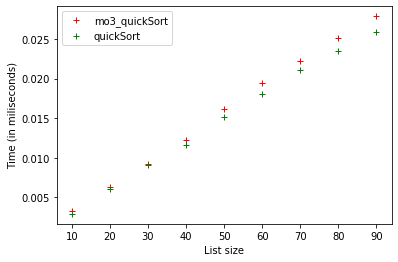

In [63]:
import matplotlib.pyplot as plt
import timeit
import random


y1, y1acc = [], 0
y2, y2acc = [], 0

reps = 10
for i in range(10, 100, 10):
    for j in range(reps):
        t1 = timeit.Timer("mo3_quickSort(random.sample(range(100), 50))", "from __main__ import mo3_quickSort, random")
        t2 = timeit.Timer("quickSort(random.sample(range(100), 50))", "from __main__ import quickSort, random")
        
        y1acc += t1.timeit(number=reps)
        y2acc += t2.timeit(number=reps)

    y1.append(y1acc/reps)
    y2.append(y2acc/reps)

x = range(10, 100, 10)        
plt.xlabel('List size')
plt.ylabel('Time (in miliseconds)')
plt.plot(x, y1, 'r+', label="mo3_quickSort")
plt.plot(x, y2, 'g+', label="quickSort")
plt.legend()
plt.show()



**Discussion of the Results**
In the excercise the goal was to reimplement the quickSort algorithm using the median of three method to decide the pivot value. The additional function defined as median was used to get the median pivot index and from there the regular algorithm did the work.

An experiment was devised to show that Canonic quickSort is as fast as mo3_quickSort when processing large lists of unsortedintegers. To implement this experiment, the timeit module was imported and random unsorted lists of range 50 were generated and sorted using the respective algorithms. As seen above in the benchmark testing, both times are very close, thus proving the above mentioned statement. However the median of three quicksort method is only slightly better.